In [36]:
!pip install requests
!pip install beautifulsoup4

In [37]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [38]:

url = "https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,RH2M&community=AG&longitude=-99.24&latitude=18.93&start=20230101&end=20231231&format=CSV"
response = requests.get(url)

with open("nasa_power.csv", "wb") as f:
    f.write(response.content)

In [39]:
if response.status_code == 200:
  print("obtuvimos la página")
else:
  print("Error al cargar la web, código:", response.status_code)

obtuvimos la página


In [40]:
df = pd.read_csv("nasa_power.csv", skiprows=10)
df.head()

,YEAR,DOY,T2M,RH2M
0,2023,1,15.59,56.98
1,2023,2,15.08,64.65
2,2023,3,15.98,60.82
3,2023,4,15.96,47.94
4,2023,5,15.87,47.94


In [41]:
# Ver estructura general
df.info()

# Ver los nombres de las columnas
print(df.columns.tolist())

# Ver primeros registros
df.head()

# Ver últimos registros (por si hay filas vacías al final)
df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    365 non-null    int64  
 1   DOY     365 non-null    int64  
 2   T2M     365 non-null    float64
 3   RH2M    365 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 11.5 KB
['YEAR', 'DOY', 'T2M', 'RH2M']


,YEAR,DOY,T2M,RH2M
360,2023,361,12.80,70.83
361,2023,362,12.98,51.55
362,2023,363,12.88,59.66
363,2023,364,12.56,65.28
364,2023,365,13.51,53.89


In [42]:
# Contar valores nulos por columna
print(df.isnull().sum())

# Eliminar filas completamente vacías (si existen)
df.dropna(how="all", inplace=True)

# O eliminar solo donde falte una columna clave como T2M (temperatura)
df.dropna(subset=["T2M"], inplace=True)


YEAR    0
DOY     0
T2M     0
RH2M    0
dtype: int64


In [43]:
df.rename(columns={"T2M": "Temperatura_C", "RH2M": "Humedad_Relativa"}, inplace=True)
df

,YEAR,DOY,Temperatura_C,Humedad_Relativa
0,2023,1,15.59,56.98
1,2023,2,15.08,64.65
2,2023,3,15.98,60.82
3,2023,4,15.96,47.94
4,2023,5,15.87,47.94
...,...,...,...,...
360,2023,361,12.80,70.83
361,2023,362,12.98,51.55
362,2023,363,12.88,59.66
363,2023,364,12.56,65.28


In [44]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              365 non-null    int64  
 1   DOY               365 non-null    int64  
 2   Temperatura_C     365 non-null    float64
 3   Humedad_Relativa  365 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 11.5 KB


(365, 4)

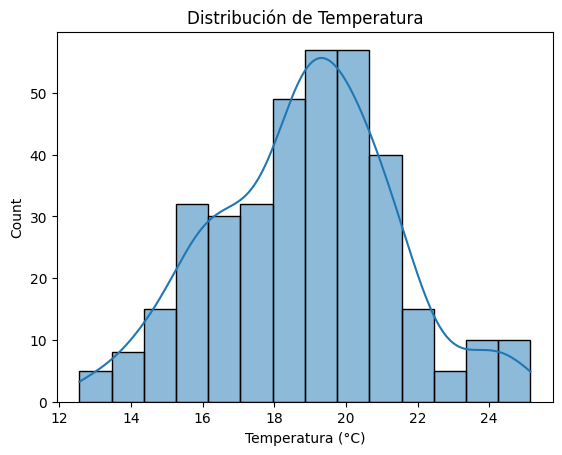

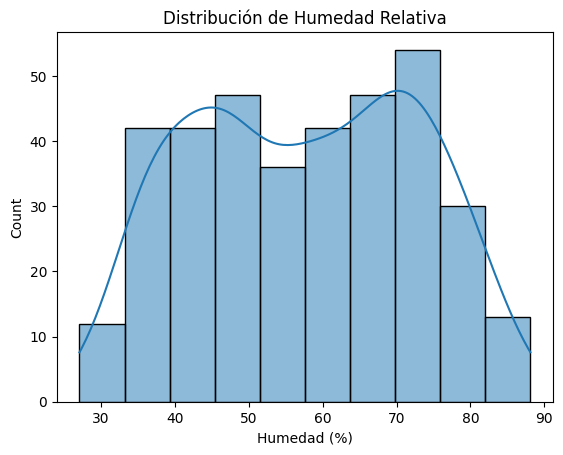

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de temperatura
sns.histplot(df["Temperatura_C"], kde=True)
plt.title("Distribución de Temperatura")
plt.xlabel("Temperatura (°C)")
plt.show()

# Histograma de humedad relativa
sns.histplot(df["Humedad_Relativa"], kde=True)
plt.title("Distribución de Humedad Relativa")
plt.xlabel("Humedad (%)")
plt.show()


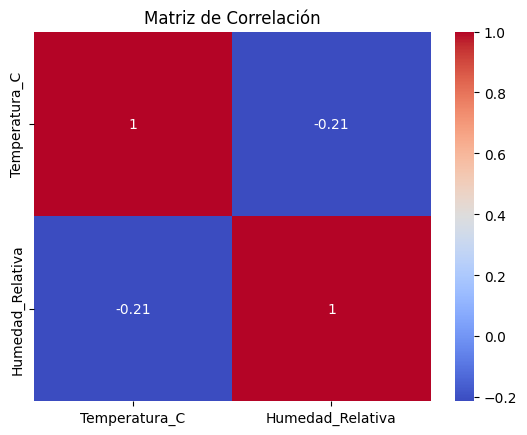

In [46]:
corr = df[["Temperatura_C", "Humedad_Relativa"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [47]:
# Si tienes columnas YEAR y DOY (día del año)
print("Año mínimo:", df["YEAR"].min())
print("Año máximo:", df["YEAR"].max())

print("Día mínimo:", df["DOY"].min())
print("Día máximo:", df["DOY"].max())

Año mínimo: 2023
Año máximo: 2023
Día mínimo: 1
Día máximo: 365
